## Introduction
This notebook demonstrates how to access and work with the Great Lakes ice concentration dataset stored in Google Cloud Storage (GCS) in Zarr format. The dataset includes ice concentration values for the Great Lakes from 1972 to 2023. Each year has ice concentration data at a resolution of 1.800 km.

The data is stored as a Zarr array, which is a chunked format designed for large, multi-dimensional datasets. Zarr allows efficient reading, writing, and slicing of data, which makes it suitable for cloud-based workflows.


In [ ]:
# Install necessary packages
!pip install zarr xarray gcsfs 


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [3]:
# Specify the path to the dataset in GCS
zarr_path = "gs://great-lakes-osd/ice_concentration.zarr"

# Open the Zarr store as an Xarray dataset
ds = xr.open_zarr(zarr_path)

# Print a summary 
ds

<xarray.Dataset> Size: 155GB
Dimensions:            (time: 18434, lat: 1024, lon: 1024)
Coordinates:
  * lat                (lat) float64 8kB 50.6 50.59 50.58 ... 38.9 38.89 38.87
  * lon                (lon) float64 8kB -92.41 -92.39 -92.38 ... -75.89 -75.87
  * time               (time) datetime64[ns] 147kB 1972-12-01 ... 2023-05-21
Data variables:
    ice_concentration  (time, lat, lon) float64 155GB dask.array<chunksize=(366, 200, 200), meta=np.ndarray>
Attributes: (12/23)
    coverage_area:            Great Lakes
    data_source:              NOAA
    description:              Great Lakes ice concentrations
    disclaimer:               Data collected and processed by NOAA and dissem...
    dissemination:            USNIC Website, CIS Website
    grid_resolution:          1.800 km
    ...                       ...
    product:                  GRID - Resolution 1800
    source:                   NAIS daily Great Lakes ice analysis
    source_url:               https://noaadata.apps.nsidc.org/NOAA/G10029/
    spatial_extent:           Lat: 38.87N to 50.6N, Lon: 92.41W to 75.87W
    time_range:               2009-01-01 to 2009-12-31
    units:                    Ice concentration (%)

In [4]:
# Accessing specific variables (i.e., ice concentration)
ice_concentration = ds['ice_concentration']
# Replace -1 with NaN 
ice_concentration = ice_concentration.where(ice_concentration != -1, float('nan'))
# Diplay variable
ice_concentration

<xarray.DataArray 'ice_concentration' (time: 18434, lat: 1024, lon: 1024)> Size: 155GB
dask.array<where, shape=(18434, 1024, 1024), dtype=float64, chunksize=(366, 200, 200), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 8kB 50.6 50.59 50.58 50.57 ... 38.91 38.9 38.89 38.87
  * lon      (lon) float64 8kB -92.41 -92.39 -92.38 ... -75.9 -75.89 -75.87
  * time     (time) datetime64[ns] 147kB 1972-12-01 1972-12-02 ... 2023-05-21

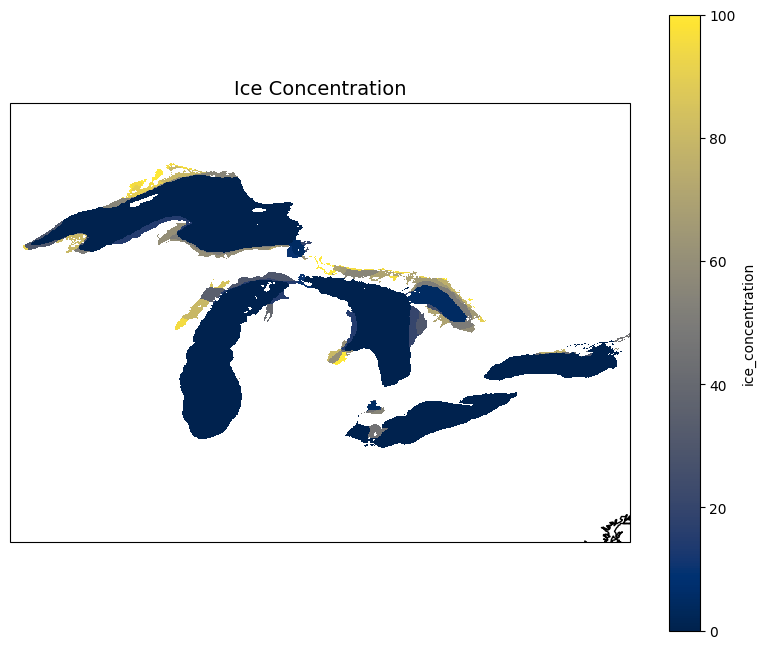

In [5]:
# Select a specific time 
ice_data = ice_concentration.isel(time=30)

# Create a Cartopy map with the desired projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on the map
# Specify the colormap and the vmin/vmax for percentage ice concentration (0-100%)
ice_data.plot(ax=ax, cmap='cividis', add_colorbar=True, vmin=0, vmax=100)

# Add geographical features to the map
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='white')

# Set the title and labels
ax.set_title('Ice Concentration (Single Day Example)', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()


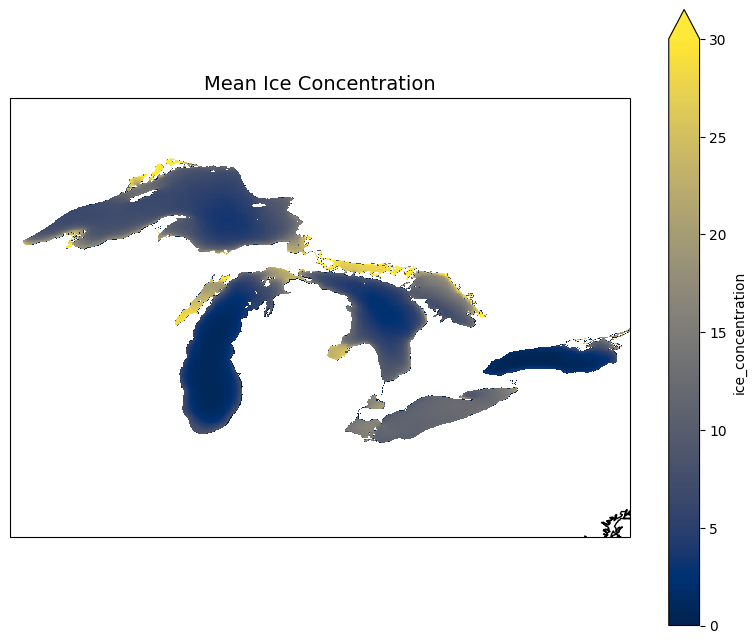

In [18]:
# Create a Cartopy map 
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the mean ice concentration 
mean_ice_concentration.plot(ax=ax, cmap='cividis', add_colorbar=True, vmin=0, vmax=30)

# Add geographical features to the map
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='white')

# Set the title and labels
ax.set_title('Mean Ice Concentration', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()